In [1]:
import matplotlib.pyplot as plt
import pyplotbrookings.pyplotbrookings as ppb
import seaborn as sns

# Brookings plot theme for all plots
ppb.set_theme()

# Getting data
penguins = sns.load_dataset("penguins")

First let's create a histogram plot using base `matplotlib`

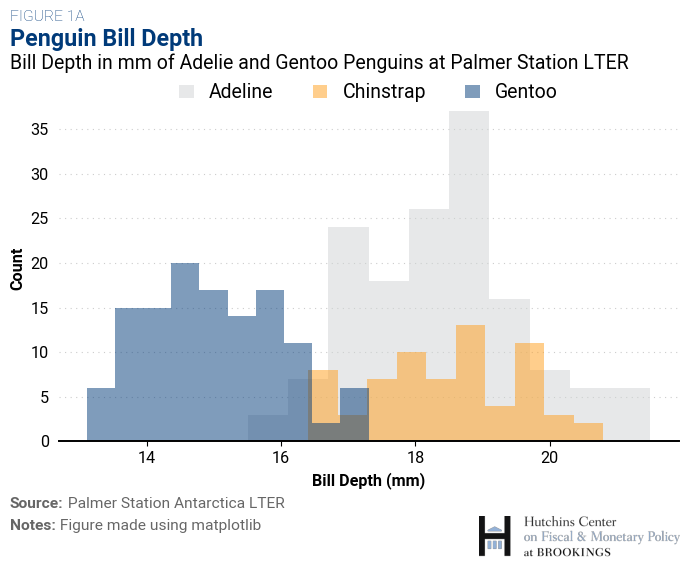

In [2]:
# Setting brand colors for current plot
ppb.set_palette('brand2', reverse=True)

# Plotting histograms
plt.hist(penguins[penguins['species'] == 'Adelie']['bill_depth_mm'], alpha=0.5, label='Adeline')
plt.hist(penguins[penguins['species'] == 'Chinstrap']['bill_depth_mm'], alpha=0.5, label='Chinstrap')
plt.hist(penguins[penguins['species'] == 'Gentoo']['bill_depth_mm'], alpha=0.5, label='Gentoo')
# Adding matplotlib legend/labels
plt.legend(ncol=3)
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Count')

# Adding Brookings titles
ppb.add_title(title='Penguin Bill Depth', 
              subtitle='Bill Depth in mm of Adelie and Gentoo Penguins at Palmer Station LTER', 
              tag='FIGURE 1A')

# Adding notes
# Note, that there is auto parsing in add_notes that will bold all text before the first colon!
ppb.add_notes('Source: Palmer Station Antarctica LTER', 
              'Notes: Figure made using matplotlib')

# Adding the Hutchins logo
ppb.add_logo('hc')

# Figures can be saved using a built in method or with matplotlb
ppb.save('Figure1A.png')
# NOTE: If using pyplot make sure you add bbox_inches='tight' so titles are not cropped
plt.savefig('Figure1A.png', bbox_inches='tight')

`pyplotbrookings` also works with `seaborn` for plotting! Let's recreate the above figure again but this time in `seaborn`.

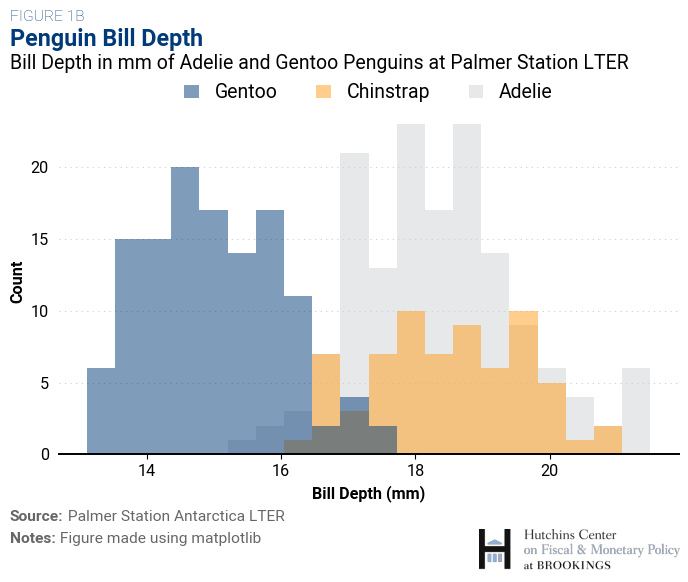

In [3]:
# Reversing data to get the correct z-order ordering of plots
ax = sns.histplot(data=penguins.iloc[::-1], 
                  x='bill_depth_mm', 
                  hue='species', 
                  # Setting the plot palette to Brookings brand2
                  palette=ppb.get_palette('brand2'), 
                  bins=20)
# Moving the legend in seaborn to the top
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1.05), ncol=3, title=None, frameon=False)
plt.xlabel('Bill Depth (mm)')

# Adding Brookings titles
ppb.add_title(title='Penguin Bill Depth', 
              subtitle='Bill Depth in mm of Adelie and Gentoo Penguins at Palmer Station LTER', 
              tag='FIGURE 1B')

# Adding notes
ppb.add_notes('Source: Palmer Station Antarctica LTER', 
              'Notes: Figure made using matplotlib')

ppb.add_logo('hc')

`pyplotbrookings` can be used with many different plots. Let's create one with a colormap!

/Users/adamsedlak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  # This is added back by InteractiveShellApp.init_path()


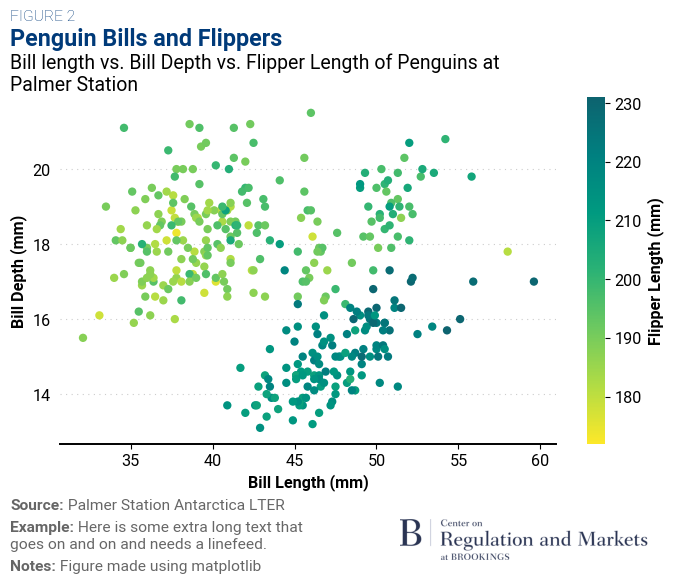

In [4]:
# Getting the Brookings sequential2 color map
cmap = ppb.get_cmap('sequential2', reverse=True)
# Creating a scatter plot
plt.scatter(data=penguins, x='bill_length_mm', y='bill_depth_mm', c='flipper_length_mm', cmap=cmap)

# Adding matplotlib legend/labels
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Adding color bar
cbar = plt.colorbar(cmap=cmap)
cbar.set_label('Flipper Length (mm)')
cbar.outline.set_visible(False)

# Adding Brookings titles
ppb.add_title(title='Penguin Bills and Flippers', 
              subtitle='Bill length vs. Bill Depth vs. Flipper Length of Penguins at\nPalmer Station', 
              tag='FIGURE 2')

# Adding notes
ppb.add_notes('Source: Palmer Station Antarctica LTER',
              'Example: Here is some extra long text that\ngoes on and on and needs a linefeed.',
              'Notes: Figure made using matplotlib')


# Adding a CRM logo
ppb.add_logo('crm', scale=0.35, offsets=(-0.1, 0))
ppb.save('Figure2.png')

Note that notes and titles auto-align to the left margin of the figure. Notes and titles can also be adjusted manually with padding.

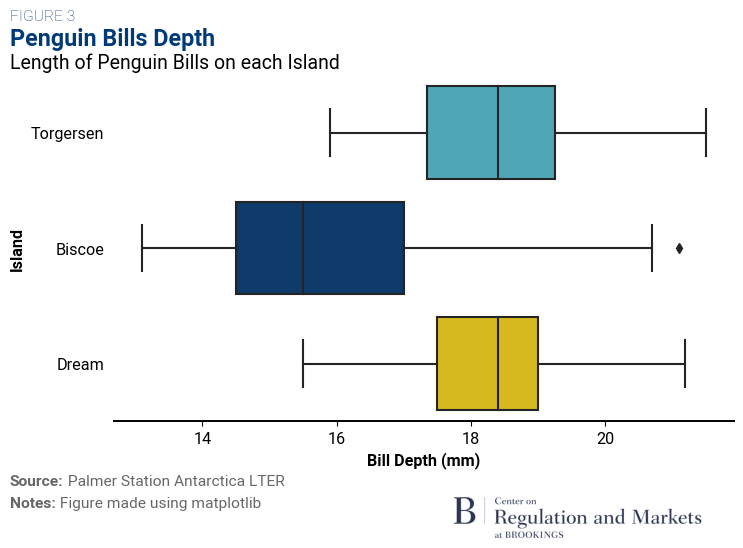

In [5]:
# Creating a boxplot
sns.boxplot(data=penguins, x='bill_depth_mm', y='island', palette=ppb.get_palette('misc'))


# Adding Brookings titles
ppb.add_title(title='Penguin Bills Depth', 
              subtitle='Length of Penguin Bills on each Island', 
              tag='FIGURE 3')

# Adding notes
ppb.add_notes('Source: Palmer Station Antarctica LTER', 
              'Notes: Figure made using matplotlib')


# Adding matplotlib legend/labels
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Island')

ppb.add_logo('crm', scale=0.35, offsets=(-0.1, 0))
ppb.save('Figure3.png')

You can also preview a palette using `view_palette()`! The numbers indicate the palette order and text color is adherent to W3C guidelines (in case you need to place black or white text on top of any palette colors). Lets look at the first four color palettes.

A list of all palettes this can be found in the doc string of `get_palette()` or by adding the `list_supported=True` argument in the `get_palette()` function.

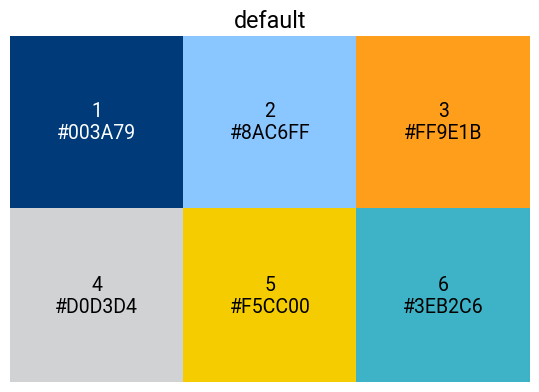

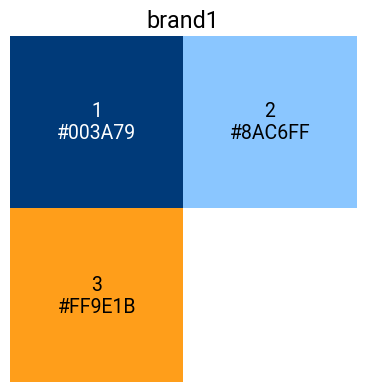

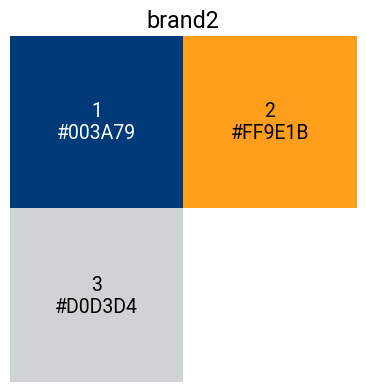

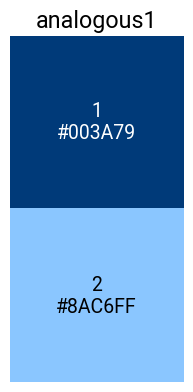

In [6]:
# Preview color palettes and the correct text color (black or white) that can be applied on top of each color
for p in ppb.get_palette('', list_supported=True)[:4]:
    plt.title(p)
    ppb.view_palette(p)

We can also preview some of the extended Brookings palettes

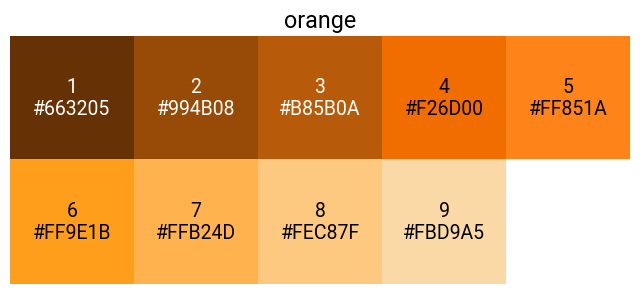

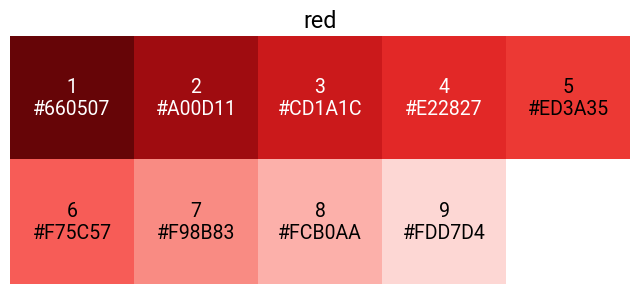

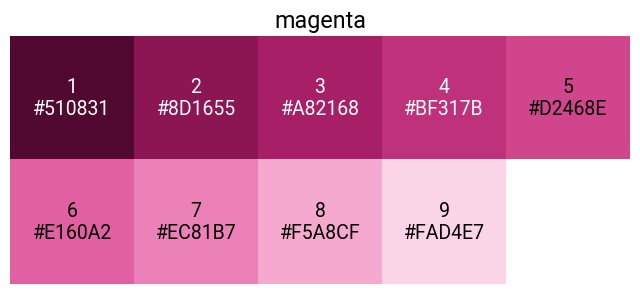

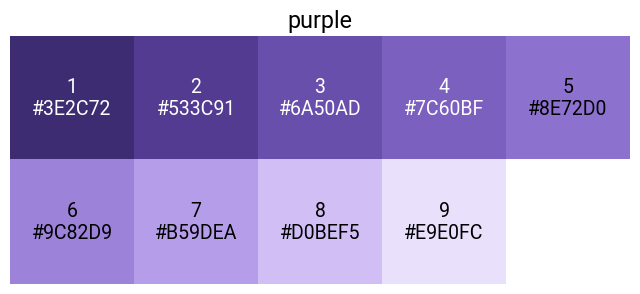

In [7]:
# Preview color palettes and the correct text color (black or white) that can be applied on top of each color
for p in ppb.get_palette('', list_supported=True)[-4:]:
    plt.title(p)
    ppb.view_palette(p)